#En este notebook aplicaremos DBSCAN en un dataset de juguete para ver como se comporta el algoritmo.

Usaremos la función [make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs) que permite crear nubes de puntos que podrian simular clusters. Se pueden controlar la cercania y tamaños de las nubes de puntos (entre otros parámetros) para ir probando propiedades de estos algoritmos de clustering.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [20]:
# se pueden definir varios parametros. Pruebe con varios para ver como cambia la nube de puntos. 
X, y = make_blobs(n_samples=100, centers=8, n_features=2, cluster_std = 0.5, random_state=0)

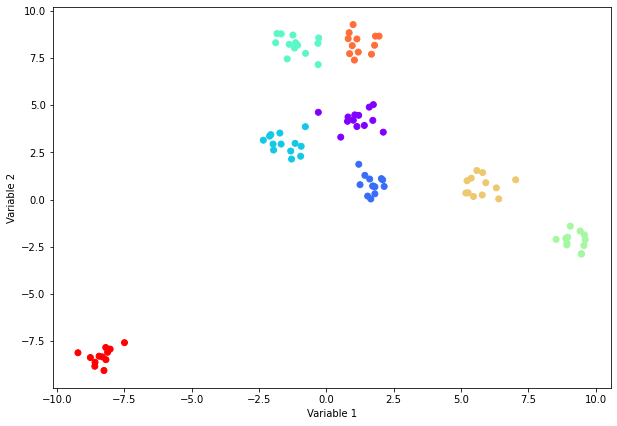

In [21]:
# Graficamos los puntos. Cada color es un cluster distinto.
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=y, cmap='rainbow')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

Aplicamos ahora DBSCAN a los datos.

Recuerde que hay 2 parámetros importantes. ¿Recuerda cuales son?

Vea el impacto que tiene en el algoritmo lso valores de estos parámetros.




In [28]:
clustering = DBSCAN(eps=1, min_samples=2).fit(X)

# con esto obtenemos las etiquetas de cada puntos que asigno el algoritmo
labels_DBSCAN = clustering.labels_
labels_DBSCAN

array([0, 1, 2, 3, 1, 1, 3, 4, 1, 4, 5, 1, 0, 1, 4, 0, 6, 4, 1, 6, 2, 6,
       2, 3, 6, 6, 5, 4, 3, 2, 1, 7, 7, 2, 4, 1, 2, 6, 3, 5, 7, 4, 3, 4,
       3, 7, 7, 5, 7, 4, 6, 7, 0, 5, 5, 0, 3, 1, 6, 4, 6, 5, 2, 0, 5, 0,
       3, 1, 7, 2, 4, 3, 0, 7, 2, 6, 5, 6, 3, 4, 0, 3, 6, 7, 1, 0, 7, 0,
       5, 2, 5, 5, 0, 6, 2, 7, 7, 7, 1, 2])

Visualicemos el resultado de DBSCAN

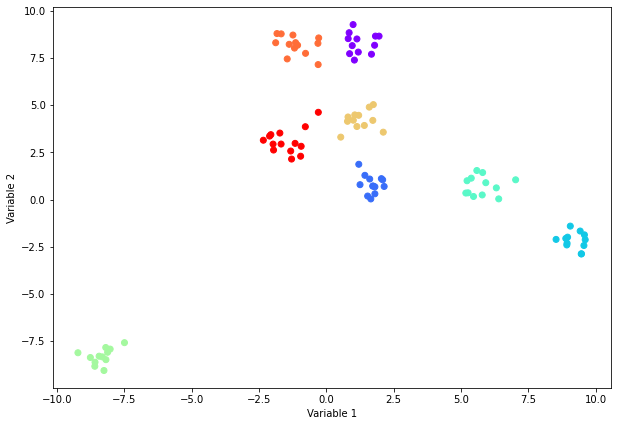

In [29]:
# Graficamos los puntos. Cada color es un cluster distinto.
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=labels_DBSCAN, cmap='rainbow')
plt.xlabel("Variable 1")
plt.ylabel("Variable 2")
plt.show()

Repita el proceso hasta llegar a los clusters que inicialmente habian.

¿Pudo hacerlo? ¿a que valores llego de los parámetros?

##Realice esto primero antes de seguir en este notebook.

##Ahora aplicaremos el código para obtener el coeficiente de silhoutte.

In [30]:
# importamos el puntaje de silhouette
from sklearn.metrics import silhouette_score

Igual que el código anterior, pero con una pequeña modificación.

In [31]:
# Creamos una lista para guardar de los coeficientes de silhouette para cada valor de parámetro
silhouette_coefficients = []

parametros = [0.4, 0.8, 1.2, 1.6, 2]
# Aca no vamos ir variando el número de cluster. ¿POR QUE?
for n in parametros:
     clustering = DBSCAN(eps=n, min_samples=2).fit(X)
     clustering.fit(X)
     score = silhouette_score(X, clustering.labels_)
     silhouette_coefficients.append(score)

Text(0, 0.5, 'Promedio coeficientes de Silhouette')

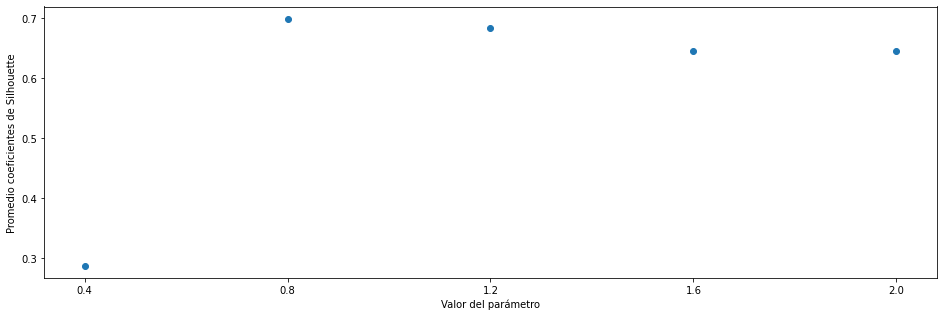

In [32]:
fig, ax = plt.subplots(figsize = (16, 5))

# estas lineas son el grafico de SSE vs el parámetro a variar
ax.scatter(parametros, silhouette_coefficients)            
ax.set_xticks(parametros)
ax.set_xlabel("Valor del parámetro")
ax.set_ylabel("Promedio coeficientes de Silhouette")

##¿Que le dice este gráfico? ¿coincide con algo ya descubierto? Discuta sobre este resultado en clases. ¿Pueden hacer lo mismo con otro valor del parámetro?

**Pregunta final: ¿Aplicamos el método del codo?**